In [1]:
import os
import pathlib

import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
del mnist

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)
x_train = (X_train.reshape(-1, 1,784) / 255).astype(np.float32)
x_val = (X_val.reshape(-1, 1,784) / 255).astype(np.float32)
x_test = (X_test.reshape(-1, 1,784) / 255).astype(np.float32)
y_test = Y_test

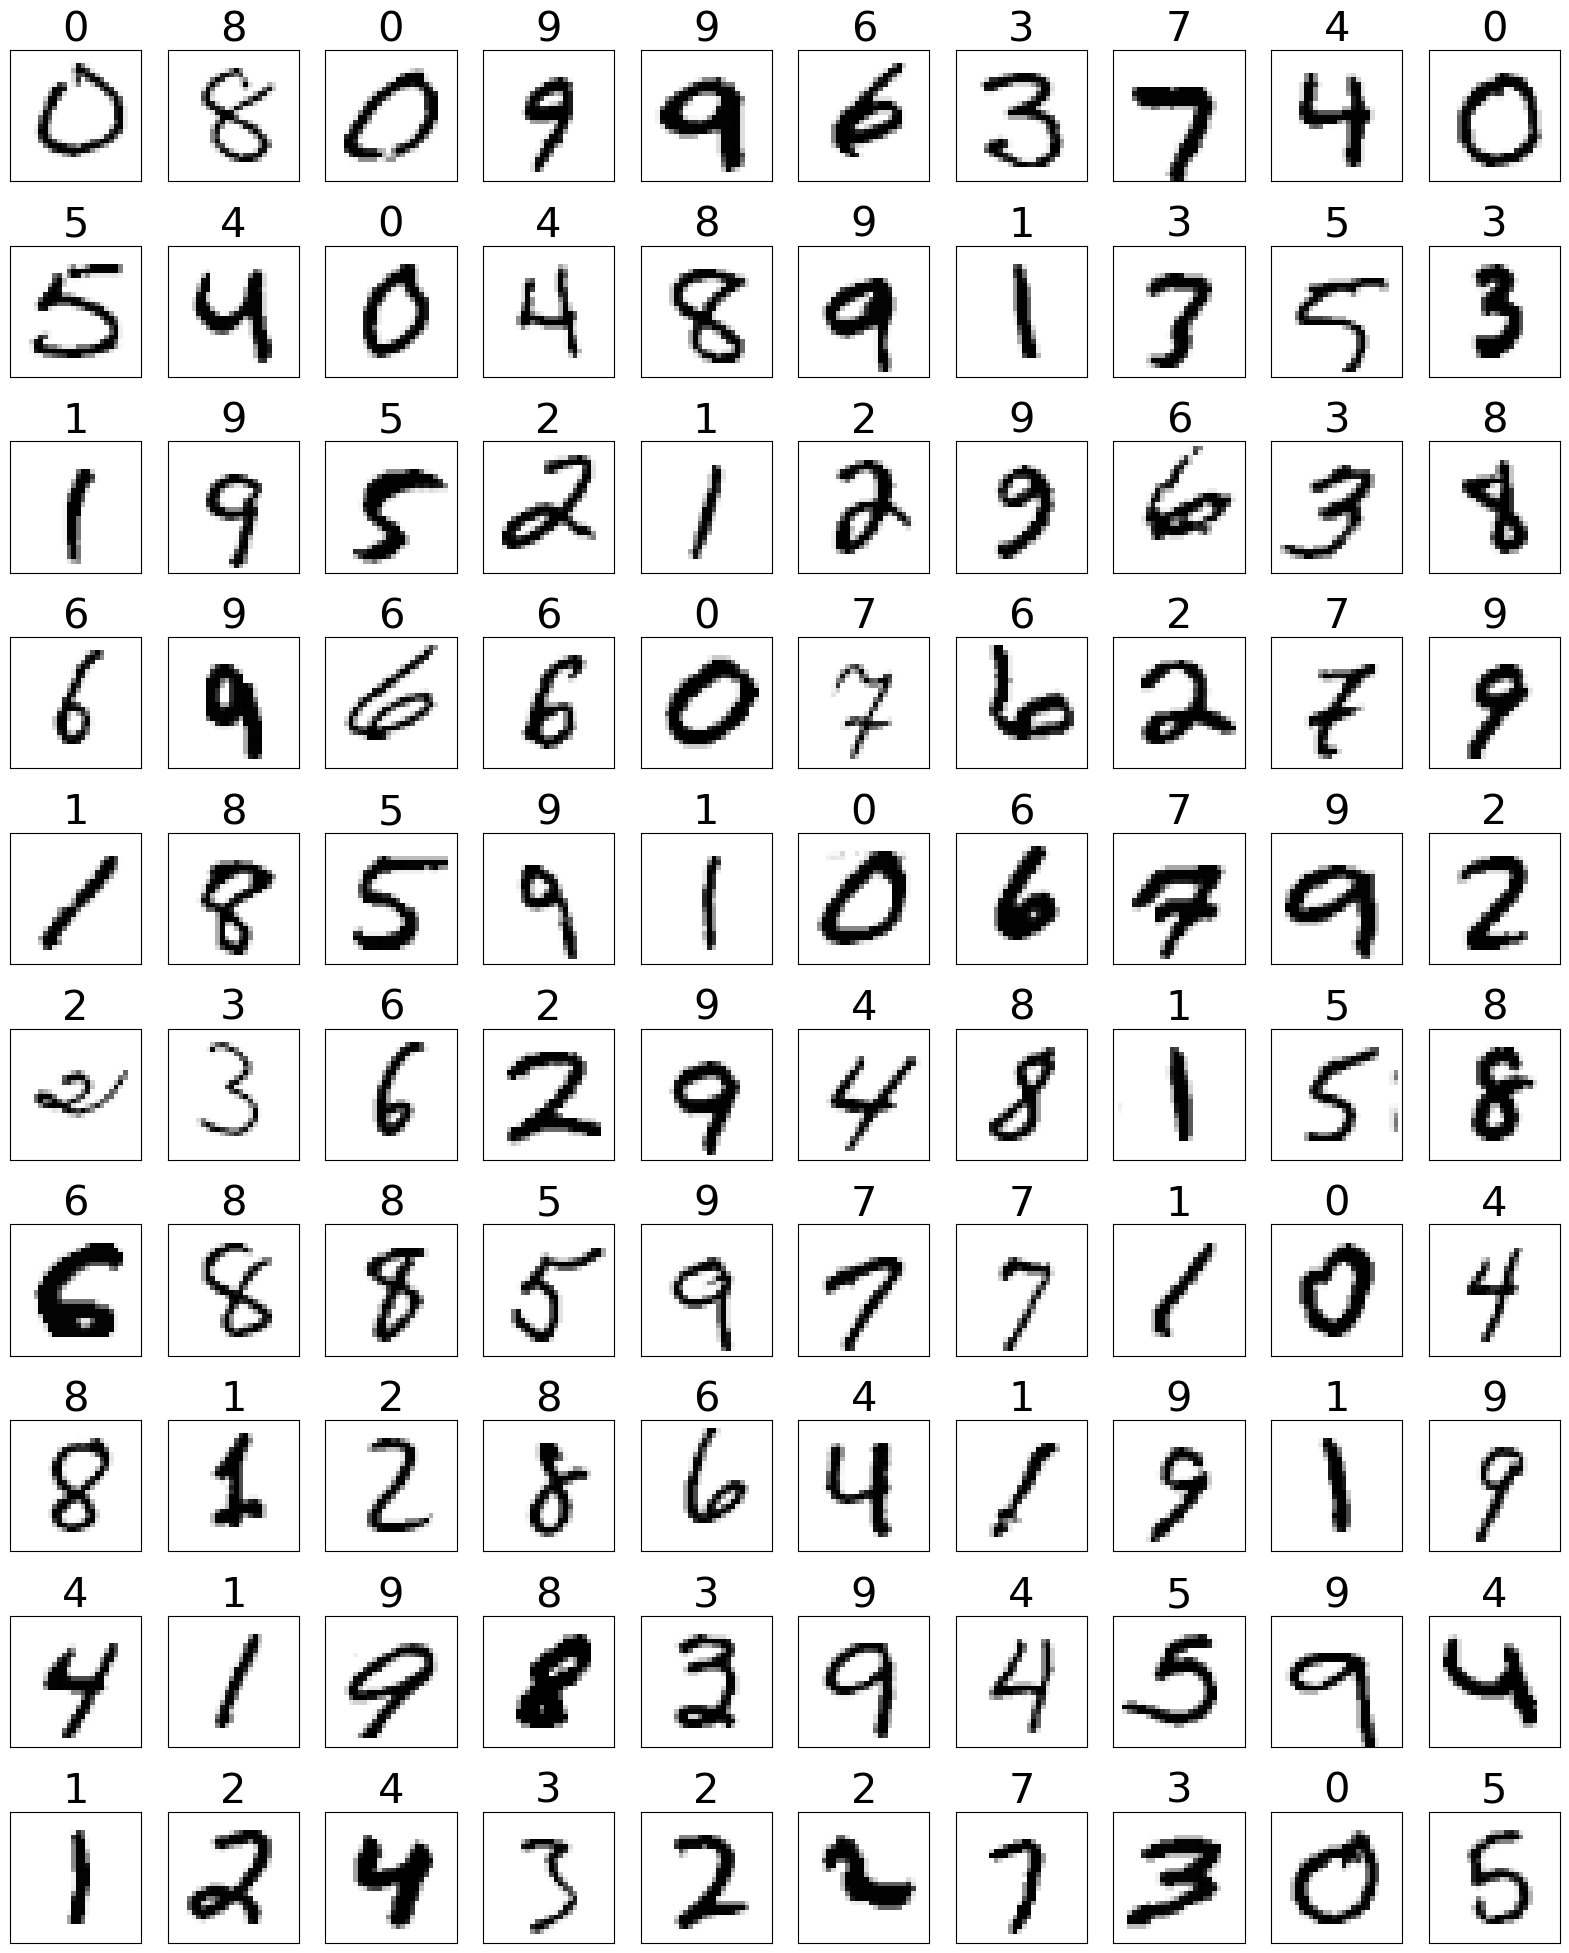

In [4]:
# 特徴のある時系列データに0~9の番号を割り振っています
# 
fig, ax = plt.subplots(10, 10,figsize=(20, 25))
for i in range(0,100):
    r = i // 10
    c = i %  10
    ax[r,c].set_xticks([])
    ax[r,c].set_yticks([])
    ax[r,c].set_title(y_train[i],fontsize=30)
    ax[r,c].imshow(X_train[i], cmap='Greys')
    #ax[r,c].plot(range(len(x_train[i][0])), x_train[i][0])
plt.show()

# 演習内容
各々の特徴を持つデータに0~9の番号を割り振りました。

|変数名| データの用途|
| -- | -- |
|x_train|教師データ 学習用(入力)|
| Y_train | 教師データ 学習用(結果) |
|x_val|教師データ 評価用(入力)|
| Y_val | 教師データ 評価用(結果) |
|x_test|検証データ(入力)|
| Y_test | 検証データ(結果) |

LSTMのニューラルネットワークを構築し、教師データで学習を行って検証データの分析を行ってください。

In [ ]:
model = Sequential()
model.add(LSTM(25, activation='tanh',
                                 recurrent_activation='sigmoid',
                                 kernel_initializer='glorot_normal',
                                 recurrent_initializer='orthogonal'))
model.add(Dense(10, kernel_initializer='glorot_normal',
                    activation='softmax'))
optimizer = optimizers.Adam(learning_rate=0.001,
                                beta_1=0.9, beta_2=0.999, amsgrad=True)

model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                       patience=5,
                       verbose=1)

hist = model.fit(x_train, y_train,
                     epochs=10, batch_size=1,
                     verbose=2,
                     validation_data=(x_val, y_val),
                     callbacks=[es])

Epoch 1/10


In [ ]:
fig, ax = plt.subplots(10, 10,figsize=(20, 25))
for i in range(0,100):
    r = i // 10
    c = i %  10
    ax[r,c].set_xticks([])
    ax[r,c].set_yticks([])
    ax[r,c].set_title(y_test[i],fontsize=30)
    ax[r,c].imshow(X_test[i], cmap='Greys')
    #ax[r,c].plot(range(len(x_test[i][0])), x_test[i][0])
plt.show()